In [ ]:
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895258 sha256=c6c9c0d71d598b69db2683543ef525a53befa5f62aabe17aaa217a8f95771626
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


**Make two txt files. One with reference and otherone as translation of neural model.**

In [ ]:
!python3 compute-bleu-sentence-args.py test.txt.raw train.txt.raw

In [ ]:
ls

compute-bleu-sentence-args.py  sample_data/  test.txt.raw  train.txt.raw


**create compute-bleu-sentence-args.py file and copy code given below in it.**

In [ ]:
# BLEU for segment by segment with arguments
# Run this file from CMD/Terminal
# Example Command: python3 compute-bleu-sentence-args.py test_file_name.txt mt_file_name.txt

import sys
import sacrebleu
from sacremoses import MosesDetokenizer
md = MosesDetokenizer(lang='en')

target_test = sys.argv[1]  # Test file argument
target_pred = sys.argv[2]  # MTed file argument

# Open the test dataset human translation file and detokenize the references
refs = []

with open(target_test) as test:
    for line in test: 
        line = line.strip().split() 
        line = md.detokenize(line) 
        refs.append(line)
    
print("Reference 1st sentence:", refs[0])

# Open the translation file by the NMT model and detokenize the predictions
preds = []

with open(target_pred) as pred:  
    for line in pred: 
        line = line.strip().split() 
        line = md.detokenize(line) 
        preds.append(line)

# Calculate BLEU for sentence by sentence and save the result to a file
with open("bleu-" + target_pred + ".txt", "w+") as output:
    for line in zip(refs,preds):
        test = line[0]
        pred = line[1]
        print(test, "\t--->\t", pred)
        bleu = sacrebleu.sentence_bleu(pred, [test], smooth_method='exp')
        print(bleu.score, "\n")
        output.write(str(bleu.score) + "\n")

**Drawing histogram of BLEU scores**

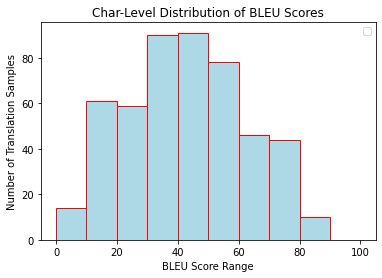

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-char.txt', unpack='False')

# set bins' interval for your data
# You have following intervals: 
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000); 
# ...
# last col is number of data elements in [100000, 200000]; 
bins = [0,10,20,30,40,50,60,70,80,90,100] 

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Char-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**for word-score**

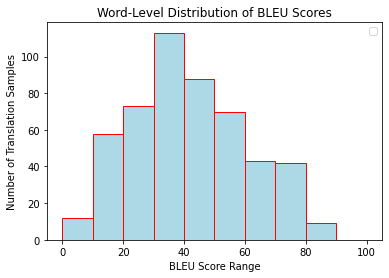

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-word.txt', unpack='False')

# set bins' interval for your data
# You have following intervals: 
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000); 
# ...
# last col is number of data elements in [100000, 200000]; 
bins = [0,10,20,30,40,50,60,70,80,90,100] 

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Word-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**code to read text and save in excel file**

In [ ]:
with open('unlexical-word.txt') as f1:
    lines = [line.rstrip() for line in f1]

with open('test.txt') as f2:
    lines2 = [line.rstrip() for line in f2]

with open('bleu-unlex-word.txt') as f3:
    lines3 = [line.rstrip() for line in f3]


print(type(lines))
print(type(lines2))
print(type(lines3))


<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
!pip install pandas
!pip install xlsxwriter

In [ ]:
import pandas as pd
import xlsxwriter

data = {'unlex-word-data': lines}

df = pd.DataFrame(data)

df['test-data'] = lines2
df['BLEU-Scores'] = lines3

print(df)
writer = pd.ExcelWriter('test-word.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Unlex-Word-Data', index=False)
writer.save()

**now, reading excel file to display outputs for low BLEU scores**

In [ ]:
import openpyxl
from pathlib import Path

xlsx_file = Path('', 'test-word.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
sheet = wb_obj.active

col_names = []
for column in sheet.iter_cols(1, sheet.max_column):
    col_names.append(column[0].value)
   
    
print(col_names)

In [ ]:
df = pd.read_excel('test-word.xlsx', sheet_name=0) #reads the first sheet of your excel file
print(df)
print(type(df))

In [ ]:
print(len(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10")))

print(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10"))



12
                                unlex-word-data  \
2                She really like shortest eggs.   
11           Does everyone possibly get a book?   
54                        Who the children are!   
140                     She tore up the secret.   
247                     I went there with feet.   
268                        Has a drop dripping?   
377        She washed him from her performance.   
540            There was a soldier on the ship.   
579  She is donating some money to cancer name.   
589                                       http:   
610                 The rope must be resumed...   
752                      Tom won a lot of race.   

                                     test-data  BLEU-Scores  
2                      She likes short skirts.     9.652435  
11             Nowadays anybody can get books.     6.567275  
54              What a nuisance that child is!     7.160476  
140        She has hit the jackpot once again.     7.654113  
247                    

In [ ]:
print(len(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20")))

print(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20"))



50
                                   unlex-word-data  \
4                  One cannot live on this island.   
22                The casino is playing money now.   
34                 The piano snapped the fire out.   
51               I think he's eaten about 10 here.   
92                                  The flies wet.   
102                       The room wasn't out yet.   
141                 You're here to speak Georgian.   
150               There is a skeleton in the park.   
155                  I'm wetting my handkerchiefs.   
171                      I'll listen to this song.   
175                        Your shift is open now.   
250                                Tom ripped off.   
262                We fishing in the River Thames.   
263            The law was criticized by the wash.   
277                   There is a bag in this room.   
382                            Four times 5 is 20.   
383             He studied some turtle in Harvard.   
413                      

In [ ]:
print(len(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30")))

print(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30"))


73
                                       unlex-word-data  \
10   She bought an vacuum cleaner from the supermar...   
28                             How deep the potato is!   
55                 It will cost about 10 thousand yen.   
57           He drank some orange juice from a bottle.   
71                            The children were bored.   
..                                                 ...   
849                             Japanese is my tongue.   
871              Tom escorting Mary from the building.   
876  Salted medical technology was one of the silve...   
884                            The problem is discuss.   
893                                It's a red herring.   

                                             test-data  BLEU-Scores  
10     She bought a vacuum cleaner at the supermarket.    26.084743  
28                              How deep this lake is!    22.957488  
55                      It will cost around 10000 yen.    25.848658  
57              He d

In [ ]:
print(len(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40")))

print(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40"))


99
                          unlex-word-data  \
9              That stinks of cigarettes.   
20                 The dog snapped at me.   
32   Tom washed the sheets on his finger.   
37          She resigned through my poem.   
39                    Taninna is purring.   
..                                    ...   
864                       Tom is escaped.   
887                No one encouraged him.   
889                            I'm tired.   
894                  Tom sat on his desk.   
897                         Stop sharing!   

                                     test-data  BLEU-Scores  
9                     You stink of cigarettes.    39.763536  
20                       The dog nipped at me.    37.991784  
32   Tom twirled the basketball on his finger.    38.260294  
37                     She scoffed at my poem.    32.466792  
39                          Taninna is paling.    35.355339  
..                                         ...          ...  
864                   

In [ ]:
print(len(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50")))

print(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50"))


84
                                       unlex-word-data  \
29                    Ted loves his wife to Elizabeth.   
36                                        I'm thirsty.   
40                    The black bird is not blackbird.   
88   Both Cristina and Luis always dreamed of study...   
125                   I can't stand the noise anymore.   
..                                                 ...   
855                                      Tom is happy.   
858                         Latin is a dead name dead.   
863                                No one deserves it.   
866                          He ate name of the apple.   
886                     The bill amounts to 5,000 yen.   

                                             test-data  BLEU-Scores  
29                       Ted loves his wife Elizabeth.    48.892302  
36                                  I'm still thirsty.    45.138644  
40                 That black bird is not a blackbird.    42.383656  
88   Both Cristina a

In [ ]:
print(len(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60")))

print(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60"))


61
                           unlex-word-data                          test-data  \
24   Susan questioned your father's shoes.  Susan shined your father's shoes.   
31                The piano value is zero.         The default value is zero.   
33          She hired a private detective.  She hired a private investigator.   
42              The train leaves at 2: 30.      The train leaves at 2:30 p.m.   
48                  I am milking my goats.              I am milking my goat.   
..                                     ...                                ...   
783           Mayuko wore a flower smells.        Mayuko wore a flower crown.   
828                           That stinks.                         It stinks.   
856              The baby is crawling now.              The baby is crawling.   
885       I was born on April 3rd in 1950.       I was born on April 3, 1950.   
890              Tom rolled up his sleeve.         Tom rolled up his sleeves.   

     BLEU-Scores  
24   

In [ ]:
print(len(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70")))

print(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70"))


43
                                       unlex-word-data  \
23   The bathtub frightened when she was talking on...   
91   The official dinner took place in the White Ho...   
97                      I have never climbed Mt. Fuji.   
104                   F. Uranus is similar to Neptune.   
118                            Will you stop babbling?   
123                            She is not a good cook.   
177           Tom couldn't pronounce Mary's last name.   
208                            aircraft is taking off.   
210        They were seated the table in a restaurant.   
212                             I saw nothing strange.   
236                    Nick still owes me ten dollars.   
242               Playing name is my favorite pastime.   
249                        No one lives in this house.   
256                 My little brother asked for money.   
280                        Tom is coming to the party.   
303                      Tom was born in the nineties.   
308        

In [ ]:
print(len(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80")))

print(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80"))


25
                                       unlex-word-data  \
5    George W. Bush was born in the state Connectic...   
25                             I arrived two days ago.   
30                   Samba is a book by Scott McCloud.   
41                          I painted the house green.   
63                             We chopped a tree down.   
73   The presentation is accompanied with a lot of ...   
99             I took him, but he ignored the warning.   
111                       This plastic chair is cheap.   
178                    The damned computer won't work.   
254                         I've lost my mobile phone.   
258  A typical of prisoners took place on May 24, 1...   
294                         My yogurt expires in 2014.   
351               Mr. Johnson's room was a large room.   
364                                 That CD costs $10.   
476                             AI sat down beside me.   
588                    Rats chewed a hole in the wall.   
659        

In [ ]:
print(len(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90")))

print(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90"))


3
                                       unlex-word-data  \
335  This dictionary contains about half a million ...   
721                 We got up at seven in the morning.   
851                      six people came to the party.   

                                             test-data  BLEU-Scores  
335  The dictionary contains about half a million w...    86.334002  
721                  I got up at seven in the morning.    86.334002  
851                 Only six people came to the party.    86.687790  


In [ ]:
print(len(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100")))

print(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100"))


0
Empty DataFrame
Columns: [unlex-word-data, test-data, BLEU-Scores]
Index: []
